# Distribuciones de probabilidad

## Usando la distribución binomial

In [12]:
import numpy as np
from numpy.random import binomial
from numpy.random import normal
from numpy import hstack
import pandas as pd

from scipy.stats import binom
from scipy.stats import norm 

from math import factorial

import matplotlib.pyplot as plt

from sklearn.neighbors import KernelDensity

### Secuencias de eventos tipo Bernoulli

$$
P(k, n; p) = {n \choose k} p^k (1-p)^{n-k} = \frac{n!}{k!(n-k)!}p^k (1-p)^{n-k}
$$

In [13]:
def P(k,n,p):
    return (factorial(n)/(factorial(k)*factorial(n-k)))*pow(p,k)*pow(1-p, n-k)

In [14]:
P(2,3,0.5)

0.375

In [15]:
3/8

0.375

In [16]:
dist = binom(3,0.5)
dist.pmf(2)

0.3750000000000001

In [17]:
i1 = P(2,3,0.5)
i2 = P(1,3,0.5)
i3 = P(0,3,0.5)

print(f'Intento 1: {i1}, Intento 2: {i2}, Intento 3: {i3}')
print(f'i1+i2+i3 = {i1+i2+i3}')

Intento 1: 0.375, Intento 2: 0.375, Intento 3: 0.125
i1+i2+i3 = 0.875


In [18]:
7/8

0.875

In [19]:
# Distribución acumulada
dist.cdf(2)

0.875

### Simulaciones de secuencias con generadores aleatorios

Los generadores aleatorios tienen como propósito simular muestras de datos que resultarían de muestreos en la vida real de procesos aleatorios como lanzar una moneda o un dado.

In [20]:
# simulación con 100 lanzamientos de moneda equilibrada
# (ejecuta esta celda varias veces para observar la variación en los resultados)
p=0.5
n=3
binomial(n, p)

2

In [21]:
# Vamos a hacer un experimento generando una muestra de conjuntos de lanzamientos de a 3 monedas
arr = []
for _ in range(100):
  arr.append(binomial(n, p))

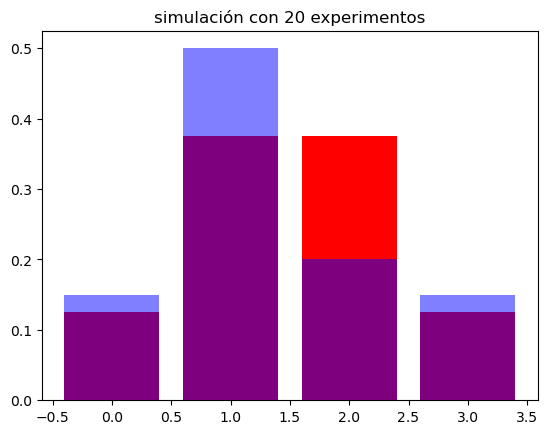

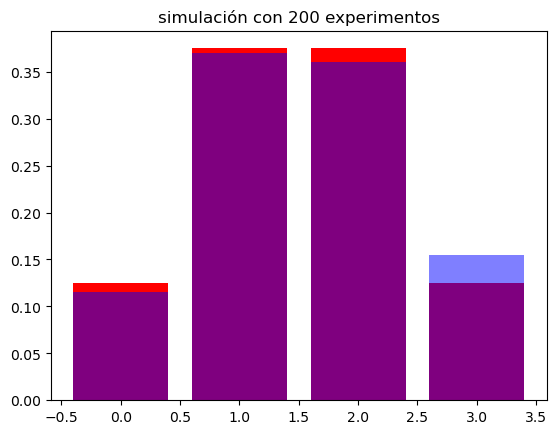

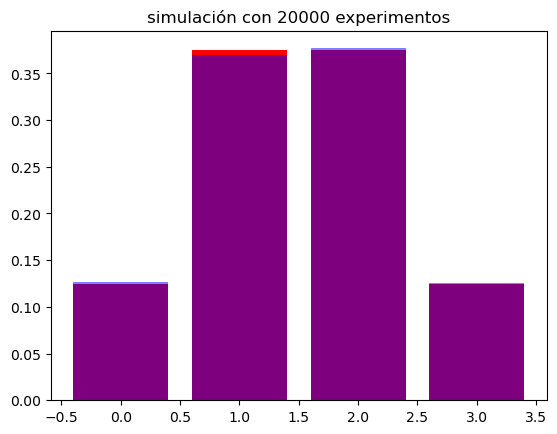

In [22]:
def plot_hist(num_trials):
  values = [0,1,2,3]
  arr = []
  for _ in range(num_trials):
    arr.append(binomial(3, 0.5))
  distribucion_simulada = np.unique(arr, return_counts=True)[1]/len(arr)
  distribucion_teorica = [binom(3, 0.5).pmf(k) for k in values]
  plt.bar(values, distribucion_teorica, label = 'teoría', color = 'red')
  plt.bar(values, distribucion_simulada, label = 'simulación', alpha = 0.5, color = 'blue')
  plt.title('simulación con {} experimentos'.format(num_trials))
  plt.show()

plot_hist(20)
plot_hist(200)
plot_hist(20000)

## Distribuciones continuas

### Distribución normal teórica


$$P(X) = \frac{1}{\sigma \sqrt{2 \pi}} \exp{\left[-\frac{1}{2}\left(\frac{X-\mu}{\sigma} \right)^2 \right]}$$

* $\mu$: media de la distribución
* $\sigma$: desviación estándar de la distribución

In [23]:
# definimos nuestra distribución gaussiana
def gaussian(x, mu, sigma):
  return 1/(sigma*np.sqrt(2*np.pi))*np.exp(-0.5*pow((x-mu)/sigma,2))

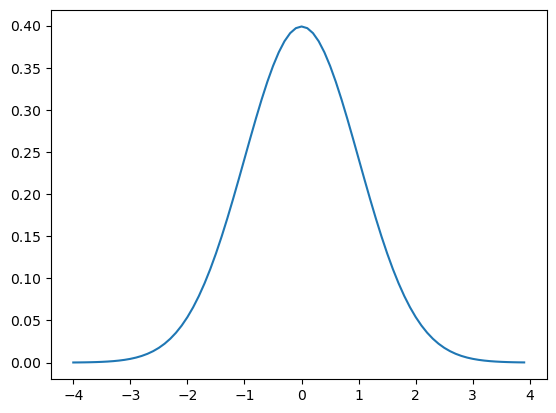

In [24]:
x = np.arange(-4,4,0.1)
y = gaussian(x, 0.0, 1.0)

plt.plot(x, y)
plt.show()

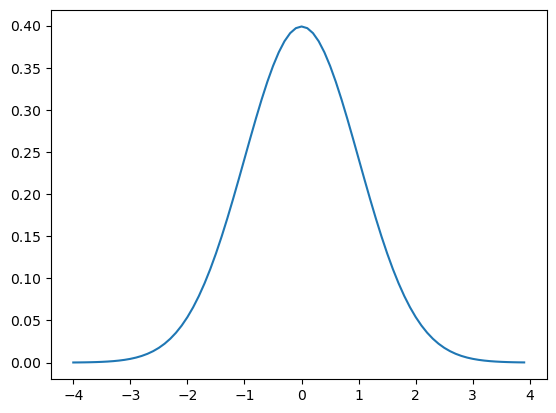

In [25]:
# usando scipy
dist = norm(0, 1)
x = np.arange(-4,4,0.1)
y = [dist.pdf(value) for value in x]
plt.plot(x, y)
plt.show()

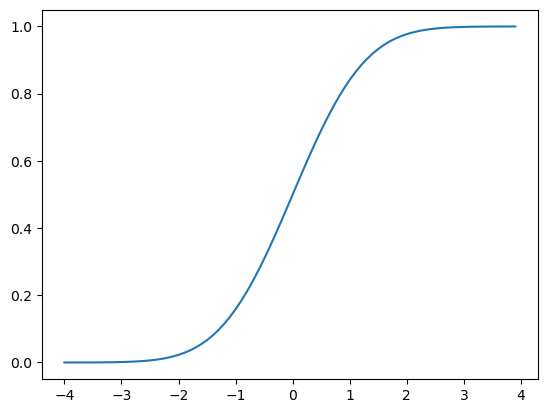

In [26]:
# calculando la distribución acumulada
dist = norm(0, 1)
x = np.arange(-4,4,0.1)
y = [dist.cdf(value) for value in x]
plt.plot(x, y)
plt.show()

### Distribución normal (gausiana) a partir de los datos

[37 38 39 40 41 42 43 44 45 46 47 48 49 50 51 52 53 54 55]


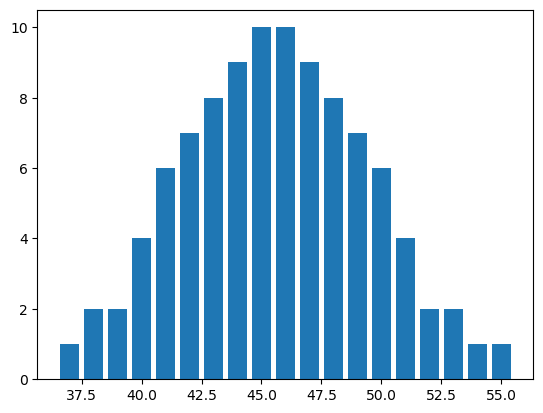

In [27]:
df = pd.read_excel('s057.xls')
arr = df['Normally Distributed Housefly Wing Lengths'].values[4:]
values, dist = np.unique(arr, return_counts=True)
print(values)
plt.bar(values, dist)
plt.show()

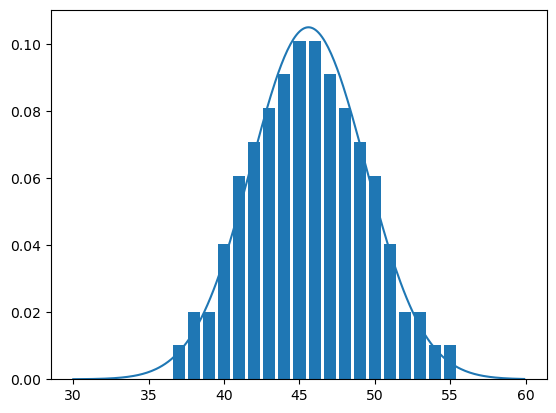

In [28]:
# estimación de la distribución de probabilidad
mu = arr.mean()

#distribución teórica
sigma = arr.std()
dist = norm(mu, sigma)
x = np.arange(30,60,0.1)
y = [dist.pdf(value) for value in x]
plt.plot(x, y)

# datos
values, dist = np.unique(arr, return_counts=True)
plt.bar(values, dist/len(arr))
plt.show()

## ¿Cómo estimar una distribución?

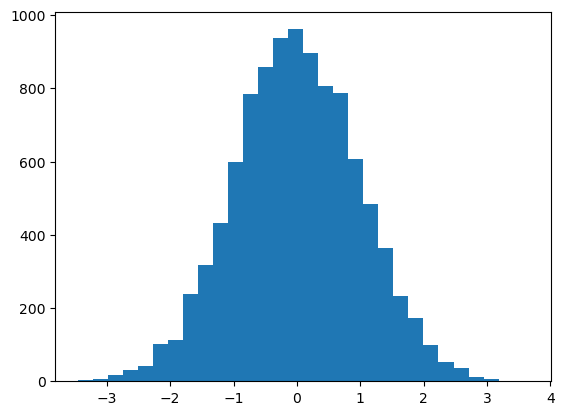

In [29]:
# generador aleatorio basado en la distribución normal
sample = normal(size=10000) 
plt.hist(sample, bins=30) 
plt.show()

### Estimación paramétrica


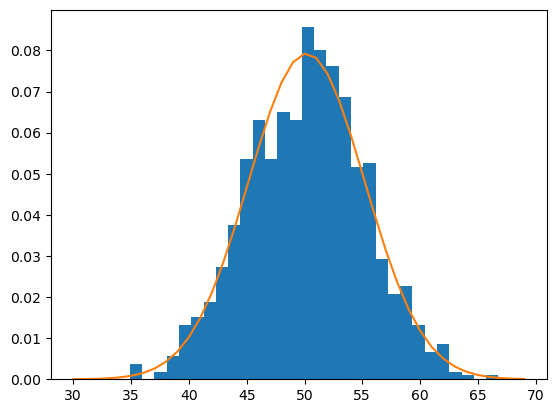

In [30]:
sample = normal(loc=50, scale=5, size=1000) # mu = 50, sigma = 5
mu = sample.mean()
sigma = sample.std()
dist = norm(mu, sigma)
values = [value for value in range(30, 70)]
probabilities = [dist.pdf(value) for value in values]
plt.hist(sample, bins=30, density=True)
plt.plot(values, probabilities)
plt.show()

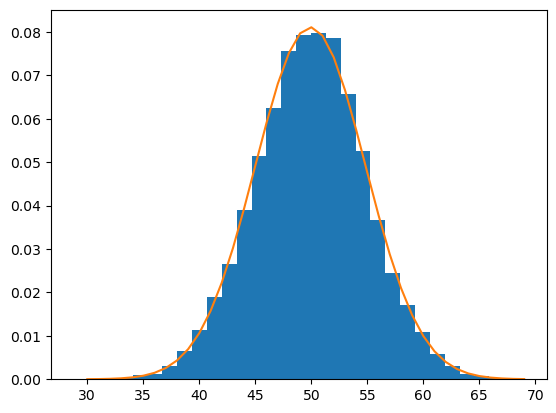

In [31]:
sample = normal(loc=50, scale=5, size=10000) # mu = 50, sigma = 5
mu = sample.mean()
sigma = sample.std()
dist = norm(mu, sigma)
values = [value for value in range(30, 70)]
probabilities = [dist.pdf(value) for value in values]
plt.hist(sample, bins=30, density=True)
plt.plot(values, probabilities)
plt.show()

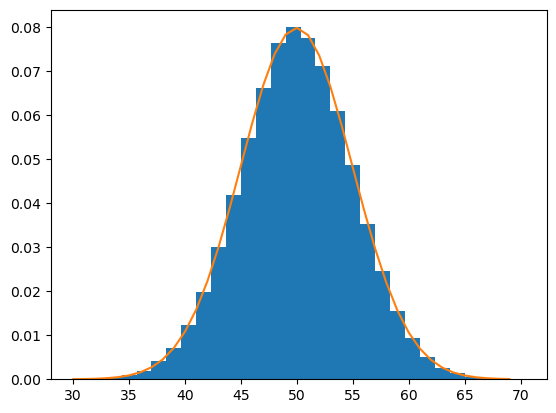

In [32]:
sample = normal(loc=50, scale=5, size=100000) # mu = 50, sigma = 5
mu = sample.mean()
sigma = sample.std()
dist = norm(mu, sigma)
values = [value for value in range(30, 70)]
probabilities = [dist.pdf(value) for value in values]
plt.hist(sample, bins=30, density=True)
plt.plot(values, probabilities)
plt.show()

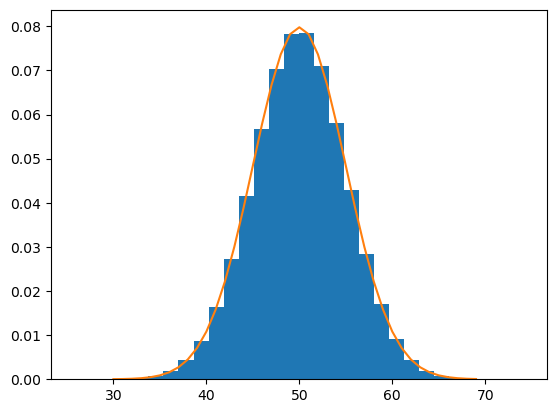

In [33]:
sample = normal(loc=50, scale=5, size=1000000) # mu = 50, sigma = 5
mu = sample.mean()
sigma = sample.std()
dist = norm(mu, sigma)
values = [value for value in range(30, 70)]
probabilities = [dist.pdf(value) for value in values]
plt.hist(sample, bins=30, density=True)
plt.plot(values, probabilities)
plt.show()

### Estimación no paramétrica

`Kernel Density estimation` 
* [parámetro de suavizado]: smoothing parameter 
* [función base]: basis function

https://scikit-learn.org/stable/modules/density.html

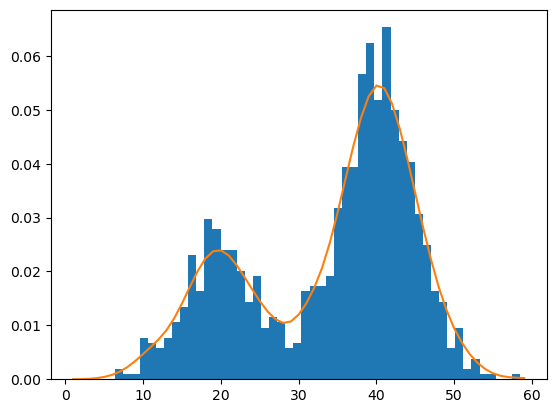

In [34]:
#construimos una distribución bimodal
sample1 = normal(loc=20, scale=5, size=300)
sample2 = normal(loc=40, scale=5, size=700)
sample = hstack((sample1, sample2))

model = KernelDensity(bandwidth=2, kernel='gaussian')
sample = sample.reshape((len(sample), 1))
model.fit(sample)

values = np.asarray([value for value in range(1, 60)])
values = values.reshape((len(values), 1))
probabilities = model.score_samples(values) #probabilidad logarítmica
probabilities = np.exp(probabilities)  # inversión de probabilidad

plt.hist(sample, bins=50, density=True) 
plt.plot(values[:], probabilities)
plt.show()